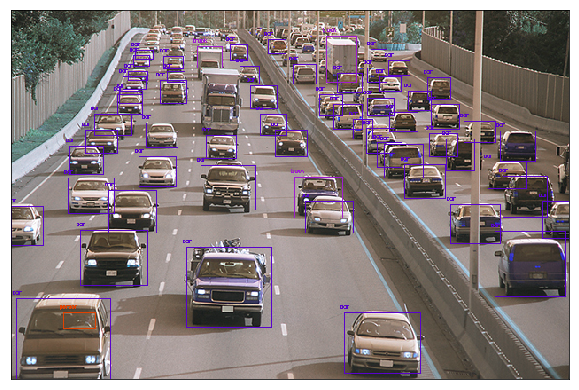

--- 79 number of objects in image---
--- 5.601661682128906 seconds ---


In [36]:
import time
import cv2
# import argparse

path = 'E:\data science\computer vision\car detection material'

coco_path = 'E:/data science/computer vision/darknet/data/'
    
yolo_cfg_path = 'E:/data science/computer vision/darknet/cfg'

# image_path = 'E:\data science\computer vision\car detection material'
    
import numpy as np


def get_output_layers(net):
    layer_names = net.getLayerNames()
    output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
    return output_layers

def draw_prediction(img, class_id, confidence, x, y, x_plus_w, y_plus_h):
    label = str(classes[class_id])
    color = COLORS[class_id]
    cv2.rectangle(img, (x,y), (x_plus_w,y_plus_h), color, 1)
    cv2.putText(img, label, (x-5,y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.2, color, 1)
image=cv2.imread("car2.jpg")
#image=cv2.resize(image,(500,500))
a=0
start_time = time.time()

Width = image.shape[1]
Height = image.shape[0]
scale = 0.00392
    
classes = None

with open(coco_path + "coco.names", 'r') as f:
    classes = [line.strip() for line in f.readlines()]

COLORS = np.random.uniform(0, 255, size=(len(classes), 3))

net = cv2.dnn.readNet('yolov3.weights','yolov3.cfg')

blob = cv2.dnn.blobFromImage(image, scale, (416,416), (0,0,0), True, crop=False)
net.setInput(blob)
outs = net.forward(get_output_layers(net))

class_ids = []
confidences = []
boxes = []
conf_threshold = 0.40
nms_threshold = 0.4

ncars=0
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
            
        if confidence > conf_threshold:
            
            center_x = int(detection[0] * Width)
            
            center_y = int(detection[1] * Height)
            
            w = int(detection[2] * Width)
            
            h = int(detection[3] * Height)
            x = center_x - w / 2
            y = center_y - h / 2
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])
            ncars=ncars + 1

indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)   
for i in indices:
    i = i[0]
    box = boxes[i]
    x = box[0]
    y = box[1]
    w = box[2]
    h = box[3]
    draw_prediction(image, class_ids[i], confidences[i], round(x), round(y), round(x+w), round(y+h))
        
    # https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg  
    # https://pjreddie.com/media/files/yolov3.weights
    
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

print("--- %s number of objects in image---" %ncars)
print("--- %s seconds ---" % (time.time() - start_time))

# De-allocate any associated memory usage
cv2.destroyAllWindows()

In [19]:
image=cv2.imread(PATH + "car2.jpg")

In [23]:
image=cv2.imread("car2.jpg")

In [20]:
image = np.asarray(image)

In [21]:
import matplotlib.pyplot as plt
import numpy as np

TypeError: Image data cannot be converted to float

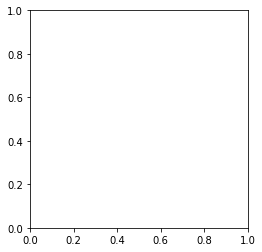

In [22]:
plt.imshow(image)